<a href="https://colab.research.google.com/github/leocassiosilva/machine-learning/blob/main/classifica%C3%A7%C3%A3o_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# um classificador linear que utiliza o Gradiente Descendente Estocástico como método de treino. Por padrão, utiliza o estimador SVM.
from sklearn.linear_model import SGDClassifier
# Uma rede neural Perceptron Multicamadas
from sklearn.neural_network import MLPClassifier

from sklearn import metrics

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
categories = ['talk.politics.misc', 'rec.autos']
twenty_train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)

In [3]:
# Nomes das categorias
print(twenty_train.target_names)

['rec.autos', 'talk.politics.misc']


In [4]:
# O scikit-learn carrega os rótulo como um array de inteiros....
twenty_train.target[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [5]:
# Mas, é possível visualizar os nomes das categorias da seguinte forma
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

talk.politics.misc
talk.politics.misc
talk.politics.misc
rec.autos
talk.politics.misc
talk.politics.misc
rec.autos
talk.politics.misc
talk.politics.misc
talk.politics.misc


In [6]:
vectorizer = TfidfVectorizer()
X_train_tfidf_vectorize = vectorizer.fit_transform(twenty_train.data)

In [7]:
# Aqui nós treinamos o classificador
#clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(70, ), random_state=1, verbose=True)
clf.fit(X_train_tfidf_vectorize, twenty_train.target) 
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(70,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(70,), random_state=1,
              solver='lbfgs', verbose=True)

In [8]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data

vect_transform = vectorizer.transform(docs_test)
predicted = clf.predict(vect_transform)


print(metrics.classification_report(twenty_test.target, predicted,target_names=twenty_test.target_names))

print(clf.classes_)

                    precision    recall  f1-score   support

         rec.autos       0.95      0.98      0.97       396
talk.politics.misc       0.98      0.93      0.95       310

          accuracy                           0.96       706
         macro avg       0.96      0.96      0.96       706
      weighted avg       0.96      0.96      0.96       706

[0 1]


In [9]:
confusion_matrix = confusion_matrix(twenty_test.target, predicted)
print(confusion_matrix)

[[390   6]
 [ 22 288]]


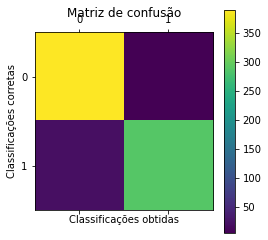

In [10]:
plt.matshow(confusion_matrix)
plt.title("Matriz de confusão")
plt.colorbar()
plt.ylabel("Classificações corretas")
plt.xlabel("Classificações obtidas")
plt.show()

In [11]:
docs_new = [
    'Wednesday morning, the legal team had appeared to turn back toward more discreet lawyering, with the announcement that Washington trial lawyer Emmet Flood would join the team inside the White House.',
    'By the time Rolls-Royce unveiled its one-of-a-kind Serenity Phantom at the 2015 Geneva Motor Show.'
]

X_new_tfidf_vectorize = vectorizer.transform(docs_new)

predicted = clf.predict(X_new_tfidf_vectorize)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'Wednesday morning, the legal team had appeared to turn back toward more discreet lawyering, with the announcement that Washington trial lawyer Emmet Flood would join the team inside the White House.' => talk.politics.misc
'By the time Rolls-Royce unveiled its one-of-a-kind Serenity Phantom at the 2015 Geneva Motor Show.' => rec.autos


Fonte: 

https://github.com/luisfredgs/machine-learning-text-classification/blob/master/20newsgroups.ipynb